# EXPLORATORY DATA ANALYSIS

## Business Problem Understanding


Company X is expanding in to new industries to diversify its portfolio. They are particularly interested in purchasing and operating airplanes for commercial and private enterprises. However, they do not have enough knowledge on the potential risks of aircrafts.

**Task** 
- Determine which aircraft are the lowest risk for the company X to start this new endeavor. 
- Translate findings into actionable insights that the stake holders can use to help decide which aircraft to purchase. 

## The Data

The data is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. 
The dataset was obtained from Kaggle. https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses 

### Loading the Data

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel("AviationData.xlsx")
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [4]:
# get the number of missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

### Get relevant columns for our analysis

In [158]:
relevant_columns = [
    'Investigation.Type',
    'Accident.Number',
    'Event.Date',
    'Country',
    'Injury.Severity',
    'Aircraft.damage',
    'Make',
    'Model',
    'Amateur.Built',
    'Number.of.Engines',
    'Engine.Type',
    'Purpose.of.flight',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Weather.Condition',
    
]

In [159]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [160]:
df2 = df.loc[:,relevant_columns]
df2.shape

(88889, 17)

### DATA CLEANING

In [161]:
df2.isna().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

In [162]:
df2.Country.value_counts()

Country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Seychelles                              1
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Turks and Caicos Islands                1
Name: count, Length: 219, dtype: int64

In [163]:
# Drop null rows in COUNTRY

df2 = df2[df2['Country'].notna()]

In [164]:
# INJURY SEVERITY

df2['Injury.Severity'].value_counts()[:20]

Injury.Severity
Non-Fatal      67212
Fatal(1)        6144
Fatal           5262
Fatal(2)        3695
Incident        2199
Fatal(3)        1137
Fatal(4)         806
Fatal(5)         233
Minor            218
Serious          173
Fatal(6)         161
Unavailable       95
Fatal(7)          56
Fatal(8)          51
Fatal(10)         32
Fatal(9)          17
Fatal(14)         11
Fatal(11)         10
Fatal(13)          9
Fatal(12)          8
Name: count, dtype: int64

In [165]:
df2['Injury.Severity'].isna().sum()

1000

In [166]:
# drop missing values
df2 = df2[df2['Injury.Severity'].notna()]

In [167]:
# AIRCRAFT DAMAGE

df2['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    63848
Destroyed      18480
Minor           2570
Unknown           92
Name: count, dtype: int64

In [168]:
# Unkown is a placeholder for missing values
df2['Aircraft.damage'].isna().sum()

2673

In [169]:
# drop missing values
df2 = df2[df2['Aircraft.damage'].notna()]

In [170]:
# MAKE

df2 = df2[df2['Make'].notna()]


In [171]:
df2['Make'] = df2['Make'].str.lower()

In [172]:
df2['Make'].value_counts()

Make
cessna             26786
piper              14697
beech               5278
bell                2581
boeing              1440
                   ...  
slater                 1
eaa chapter 229        1
prudhomme              1
o'hara bob             1
orlican s r o          1
Name: count, Length: 7511, dtype: int64

In [173]:
df2.isna().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Make                          3
Model                        43
Amateur.Built                82
Number.of.Engines          4523
Engine.Type                5436
Purpose.of.flight          4087
Total.Fatal.Injuries      10898
Total.Serious.Injuries    12169
Total.Minor.Injuries      11459
Total.Uninjured            5798
Weather.Condition          2874
dtype: int64

In [174]:
# MODEL
df2 = df2[df2['Model'].notna()]

In [108]:
df2['Model']  = df2.Model.str.lower()

In [175]:
df2.Model.value_counts()

Model
152             2350
172             1721
172N            1147
PA-28-140        927
150              817
                ... 
BO-105 CBS-4       1
B-757-23A          1
COLT 240A          1
CIRRUS-S           1
M-8 EAGLE          1
Name: count, Length: 11751, dtype: int64

In [176]:
df2.isna().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Make                          3
Model                         0
Amateur.Built                81
Number.of.Engines          4515
Engine.Type                5421
Purpose.of.flight          4080
Total.Fatal.Injuries      10891
Total.Serious.Injuries    12160
Total.Minor.Injuries      11452
Total.Uninjured            5794
Weather.Condition          2865
dtype: int64

In [177]:
# AMATEUR BUILT
df2 = df2[df2['Amateur.Built'].notna()]
df2.isna().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Make                          3
Model                         0
Amateur.Built                 0
Number.of.Engines          4451
Engine.Type                5359
Purpose.of.flight          4032
Total.Fatal.Injuries      10843
Total.Serious.Injuries    12089
Total.Minor.Injuries      11377
Total.Uninjured            5737
Weather.Condition          2825
dtype: int64

In [178]:
# NUMBER OF ENGINES

df2['Number.of.Engines'].value_counts()

# 0.0 is an outlier. A plane can't have 0 engines

Number.of.Engines
1.0    68973
2.0     9690
0.0     1088
3.0      321
4.0      304
8.0        2
6.0        1
Name: count, dtype: int64

In [179]:
# use median to fill the missing values.
# Median and Mean are almost same and lie at 1
df2['Number.of.Engines'] = df['Number.of.Engines'].fillna(df2['Number.of.Engines'].median())
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84830 entries, 0 to 88886
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      84830 non-null  object        
 1   Accident.Number         84830 non-null  object        
 2   Event.Date              84830 non-null  datetime64[ns]
 3   Country                 84830 non-null  object        
 4   Injury.Severity         84830 non-null  object        
 5   Aircraft.damage         84830 non-null  object        
 6   Make                    84827 non-null  object        
 7   Model                   84830 non-null  object        
 8   Amateur.Built           84830 non-null  object        
 9   Number.of.Engines       84830 non-null  float64       
 10  Engine.Type             79471 non-null  object        
 11  Purpose.of.flight       80798 non-null  object        
 12  Total.Fatal.Injuries    73987 non-null  float64    

In [180]:
# Replace 'Number.of.Engines' with 1.0 where 'Number.of.Engines' is 0.0

df2['Number.of.Engines'] = df2['Number.of.Engines'].replace(0.0, 1.0)


df2['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    74512
2.0     9690
3.0      321
4.0      304
8.0        2
6.0        1
Name: count, dtype: int64

In [181]:
# ENGINE TYPE

df2['Engine.Type'].value_counts()

# Unkown, None, UNK, are not valid engine types

Engine.Type
Reciprocating      69017
Turbo Shaft         3433
Turbo Prop          3123
Unknown             1802
Turbo Fan           1547
Turbo Jet            535
Electric               8
NONE                   2
Hybrid Rocket          1
Geared Turbofan        1
LR                     1
UNK                    1
Name: count, dtype: int64

In [182]:
# Unkown, None, UNK, are not valid engine types so we drop

df2 = df2[~df2['Engine.Type'].isin(['Unknown', 'NONE', 'UNK'])]


In [183]:
# drop the missing values
df2 = df2[df2['Engine.Type'].notna()]

In [184]:
df2.isna().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight          2133
Total.Fatal.Injuries      10086
Total.Serious.Injuries    11025
Total.Minor.Injuries      10245
Total.Uninjured            4906
Weather.Condition           667
dtype: int64

In [185]:
df2['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     45931
Instructional                 9937
Unknown                       5190
Aerial Application            4549
Business                      3704
Positioning                   1507
Other Work Use                1070
Ferry                          759
Aerial Observation             679
Public Aircraft                590
Executive/corporate            489
Flight Test                    360
Skydiving                      167
External Load                   97
Banner Tow                      95
Public Aircraft - Federal       92
Air Race show                   69
Public Aircraft - Local         68
Public Aircraft - State         59
Air Race/show                   48
Glider Tow                      37
Firefighting                    23
Air Drop                         8
PUBS                             2
ASHO                             2
PUBL                             1
Name: count, dtype: int64

In [186]:
df2['Purpose.of.flight'].isna().sum()

2133

In [187]:
# we can drop the missing values in Purpose.of.flight
df2 = df2[df2['Purpose.of.flight'].notna()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75533 entries, 0 to 88767
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      75533 non-null  object        
 1   Accident.Number         75533 non-null  object        
 2   Event.Date              75533 non-null  datetime64[ns]
 3   Country                 75533 non-null  object        
 4   Injury.Severity         75533 non-null  object        
 5   Aircraft.damage         75533 non-null  object        
 6   Make                    75533 non-null  object        
 7   Model                   75533 non-null  object        
 8   Amateur.Built           75533 non-null  object        
 9   Number.of.Engines       75533 non-null  float64       
 10  Engine.Type             75533 non-null  object        
 11  Purpose.of.flight       75533 non-null  object        
 12  Total.Fatal.Injuries    66138 non-null  float64    

In [188]:
# TOTAL FATAL INJURIES

df2['Total.Fatal.Injuries'].mean()

0.4531131875774895

In [189]:
df2['Total.Fatal.Injuries'].median()

0.0

In [190]:
df2['Total.Fatal.Injuries'].isna().sum()

9395

In [191]:
# use median to fill missing values
df2['Total.Fatal.Injuries'] = df2['Total.Fatal.Injuries'].fillna(df2['Total.Fatal.Injuries'].median())

In [192]:
#  Total.Serious.Injuries
df2['Total.Serious.Injuries'].isna().sum()

10277

In [193]:
df2['Total.Serious.Injuries'].mean()

0.23436925340198603

In [194]:
df2['Total.Serious.Injuries'].median()

0.0

In [195]:
df2['Total.Serious.Injuries'] = df2['Total.Serious.Injuries'].fillna(df2['Total.Serious.Injuries'].median())
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75533 entries, 0 to 88767
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      75533 non-null  object        
 1   Accident.Number         75533 non-null  object        
 2   Event.Date              75533 non-null  datetime64[ns]
 3   Country                 75533 non-null  object        
 4   Injury.Severity         75533 non-null  object        
 5   Aircraft.damage         75533 non-null  object        
 6   Make                    75533 non-null  object        
 7   Model                   75533 non-null  object        
 8   Amateur.Built           75533 non-null  object        
 9   Number.of.Engines       75533 non-null  float64       
 10  Engine.Type             75533 non-null  object        
 11  Purpose.of.flight       75533 non-null  object        
 12  Total.Fatal.Injuries    75533 non-null  float64    

In [196]:
# MINOR INJURIES

df2['Total.Minor.Injuries'].mean()

0.3210518338890573

In [197]:
df2['Total.Minor.Injuries'].median()

0.0

In [198]:
df2['Total.Minor.Injuries'].isna().sum()

9553

In [199]:
df2['Total.Minor.Injuries'] = df2['Total.Minor.Injuries'].fillna(df2['Total.Minor.Injuries'].median())
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75533 entries, 0 to 88767
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      75533 non-null  object        
 1   Accident.Number         75533 non-null  object        
 2   Event.Date              75533 non-null  datetime64[ns]
 3   Country                 75533 non-null  object        
 4   Injury.Severity         75533 non-null  object        
 5   Aircraft.damage         75533 non-null  object        
 6   Make                    75533 non-null  object        
 7   Model                   75533 non-null  object        
 8   Amateur.Built           75533 non-null  object        
 9   Number.of.Engines       75533 non-null  float64       
 10  Engine.Type             75533 non-null  object        
 11  Purpose.of.flight       75533 non-null  object        
 12  Total.Fatal.Injuries    75533 non-null  float64    

In [200]:
# TOTAL UNINJURED

df2['Total.Uninjured'].mean()

2.3258368274674233

In [201]:
df2['Total.Uninjured'].median()

1.0

In [202]:
df2['Total.Uninjured'].isna().sum()

4700

In [203]:
df2['Total.Uninjured'].value_counts()

Total.Uninjured
0.0      24908
1.0      23197
2.0      14551
3.0       3695
4.0       2292
         ...  
254.0        1
309.0        1
194.0        1
206.0        1
252.0        1
Name: count, Length: 264, dtype: int64

In [204]:
df2['Total.Uninjured'] = df2['Total.Uninjured'].fillna(df2['Total.Uninjured'].median())
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75533 entries, 0 to 88767
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      75533 non-null  object        
 1   Accident.Number         75533 non-null  object        
 2   Event.Date              75533 non-null  datetime64[ns]
 3   Country                 75533 non-null  object        
 4   Injury.Severity         75533 non-null  object        
 5   Aircraft.damage         75533 non-null  object        
 6   Make                    75533 non-null  object        
 7   Model                   75533 non-null  object        
 8   Amateur.Built           75533 non-null  object        
 9   Number.of.Engines       75533 non-null  float64       
 10  Engine.Type             75533 non-null  object        
 11  Purpose.of.flight       75533 non-null  object        
 12  Total.Fatal.Injuries    75533 non-null  float64    

In [205]:
df2['Weather.Condition'].value_counts()

Weather.Condition
VMC    69414
IMC     5146
UNK      564
Unk       76
Name: count, dtype: int64

In [206]:
df2['Weather.Condition'].isna().sum()

333

In [207]:
# UNK and Unk are place holders for missing values. we have to drop them.
df2 = df2[df2['Weather.Condition'].notna()]

In [208]:
df2 = df2[~df2['Weather.Condition'].isin(['UNK', 'Unk'])]

In [209]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74560 entries, 2 to 88767
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      74560 non-null  object        
 1   Accident.Number         74560 non-null  object        
 2   Event.Date              74560 non-null  datetime64[ns]
 3   Country                 74560 non-null  object        
 4   Injury.Severity         74560 non-null  object        
 5   Aircraft.damage         74560 non-null  object        
 6   Make                    74560 non-null  object        
 7   Model                   74560 non-null  object        
 8   Amateur.Built           74560 non-null  object        
 9   Number.of.Engines       74560 non-null  float64       
 10  Engine.Type             74560 non-null  object        
 11  Purpose.of.flight       74560 non-null  object        
 12  Total.Fatal.Injuries    74560 non-null  float64    

### Visualizations

What determines aircraft that are lowest risk

Questions to ask. 


In [210]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74560 entries, 2 to 88767
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      74560 non-null  object        
 1   Accident.Number         74560 non-null  object        
 2   Event.Date              74560 non-null  datetime64[ns]
 3   Country                 74560 non-null  object        
 4   Injury.Severity         74560 non-null  object        
 5   Aircraft.damage         74560 non-null  object        
 6   Make                    74560 non-null  object        
 7   Model                   74560 non-null  object        
 8   Amateur.Built           74560 non-null  object        
 9   Number.of.Engines       74560 non-null  float64       
 10  Engine.Type             74560 non-null  object        
 11  Purpose.of.flight       74560 non-null  object        
 12  Total.Fatal.Injuries    74560 non-null  float64    

First let's determine the Make and Model that has been involved in many Accidents

In [217]:
make_model_group = df2.groupby(['Make', 'Model'], sort=False).size().reset_index(name='AccidentCount')
make_model_group

,Make,Model,AccidentCount
0,cessna,172M,758
1,rockwell,112,6
2,cessna,180,594
3,cessna,140,387
4,cessna,401B,5
...,...,...,...
15137,cessna,305C (0-1E),1
15138,mossman michael d,ZENAIR CH 601 HD,1
15139,hibbard norman e,THORP T-18,1
15140,waszak arthur b,WITTMAN TAILWIND W10,1


In [219]:
make_model_group = make_model_group.sort_values(by='AccidentCount', ascending=False)
make_model_group

,Make,Model,AccidentCount
15,cessna,152,2295
13,cessna,172,1554
46,cessna,172N,1106
44,piper,PA-28-140,875
78,cessna,150,773
...,...,...,...
14216,d & k aviation,BABY BELLE,1
14215,aircraft mfg & dvlpmt co,CH601XLi SLSA,1
14278,croft robert c,KITFOX SUPER SPORT,1
14203,gerald donovan,RANS S-16,1


TypeError: can only concatenate str (not "int") to str

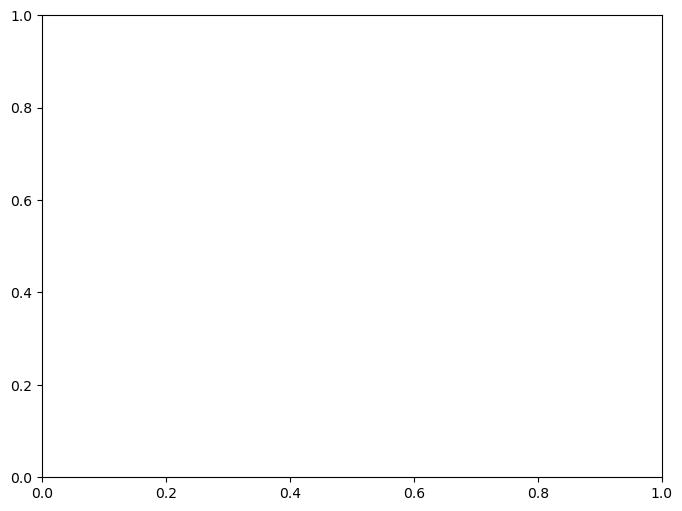

In [232]:
# plotting the top 10 make and model 

fig, ax = plt.subplots(figsize=(8,6))

ax.barh(make_model_group['Make'][:10] + ' '+ make_model_group['Model'][:10], make_model_group['AccidentCount'][:10])
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Make and Model')
ax.set_title('Top 10 Aircraft Makes and Models Involved in Accidents');